## Analysis of TOFPET2 data with 2 integration time windows

setup: 1 AMCRYS scintillator of dimensions $5\times 5 \times 5$ cm$^3$, coupled to 64-SiPM SensL array.
The SensL array is split using the FEB/S 2ro dual-readout board

data collected with $^{252}$Cf source 

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/PSD_1.3/'

## Load data

In [3]:
SiPMpairs = pd.read_csv( main_data_path + 'Cf252/Cf252_AMCRYS_UPS113NG_100_sec_eventsWithPSD.csv')
SiPMpairs

,eventID,SiPM,time[ms],Q(prompt)[a.u.],Q(total)[a.u.],tail/total,detector,channels
0,0,6,797.602074,0.953558,0.972931,0.019911,12,[613;615;]
1,1,5,797.602074,0.759192,1.049202,0.276410,12,[609;610;]
2,2,24,852.861238,0.546320,0.559010,0.022700,12,[632;631;]
3,3,10,856.254151,4.613131,5.005844,0.078451,12,[599;598;]
4,4,17,856.254151,3.987485,4.135308,0.035747,12,[577;576;]
...,...,...,...,...,...,...,...,...
4383,8781,28,100558.358796,0.203361,0.209615,0.029834,12,[523;603;]
4384,8783,26,100558.358793,0.021349,0.274177,0.922133,12,[526;519;]
4385,8784,13,100558.358794,0.098618,0.257972,0.617719,12,[547;611;]
4386,8788,10,100558.358795,0.526904,0.574682,0.083139,12,[535;534;]


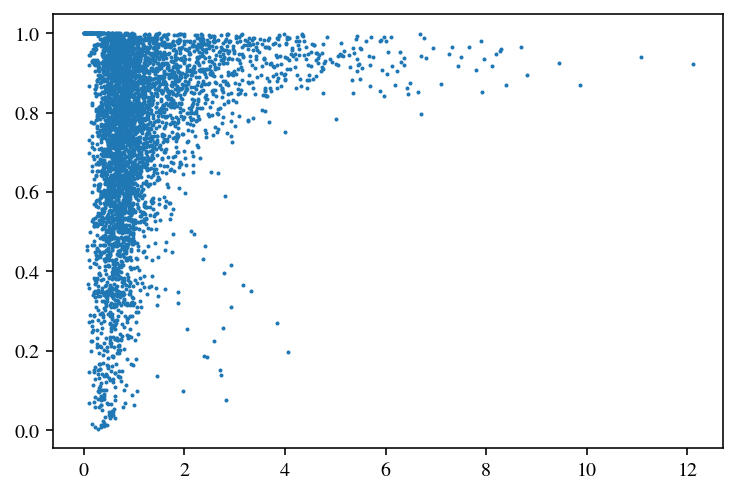

In [6]:
PSD = np.array(SiPMpairs['Q(prompt)[a.u.]'])/np.array(SiPMpairs['Q(total)[a.u.]'])
# PSD = SiPMpairs['tail/total']
Qtot = SiPMpairs['Q(total)[a.u.]']

plt.scatter( Qtot, PSD, s=1)